###  Name    :  Syed Muhammad Haris      -------       Roll No :  20B-100-SE
####  Section :  A 
#### Assignment : 2
================================================================================================================

# EDA On Students performance in exams
#### Performed By Syed Muhammad Haris
#### Marks secured by the students in college

## Main Goal:
#### To understand the influence and effect of various factors like economic, personal and social on the students performance in exams so you can assist your children in a better way,

## Inferences would be : 
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences 

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Let us initialize the required value ( we will use them later in the program to perform the EDA)
#### we will set the minimum marks to 60 to pass in a exam as per rule by UIT.

In [2]:
passmark = 60

#### Let us read the data from the csv file and We will print top few rows to understand about the various data columns.

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## We Will Perform Data Preprocessing.

#### Let us check for any missing values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### As seen above, there are no missing ( null ) values in this dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#these are All the columns that contains object type columns.
columns_with_object = [col for col in df.columns if df[col].dtype == 'object']
columns_with_object

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## Exploratory Data Analysis.

#### Size of data frame

In [7]:
print (df.shape)

(1000, 8)


#### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Let's Visualize Key Points of Data

#### Students Gender

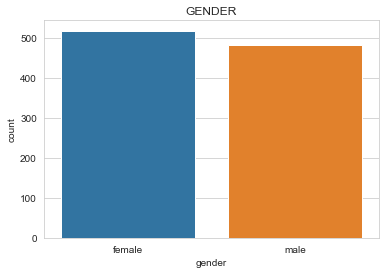

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.countplot(df['gender'])
plt.title('GENDER')
plt.show()

#### Race/Ethnicity Of Students

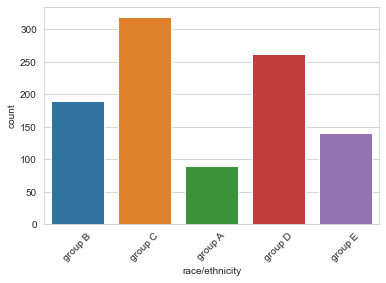

In [10]:
sns.countplot(df['race/ethnicity'])
plt.xticks(rotation=45)
plt.show()

####  Let us explore the Math Score first

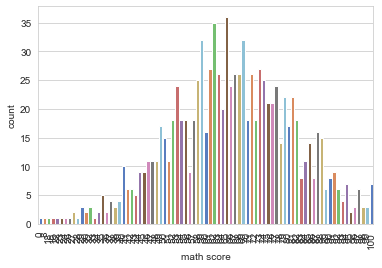

In [11]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

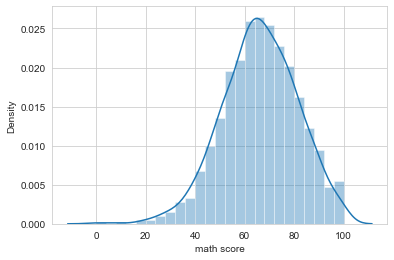

In [12]:
sns.distplot(df['math score'])
plt.show()

#### How many students passed in Math exam ?

In [13]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'Fail', 'Pass')
df.Math_PassStatus.value_counts()

Pass    677
Fail    323
Name: Math_PassStatus, dtype: int64

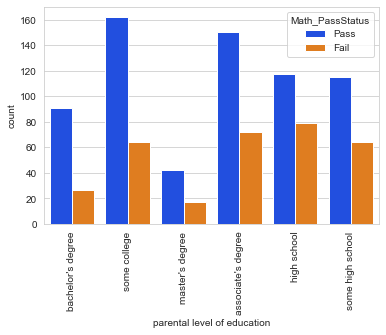

In [14]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore the Reading score

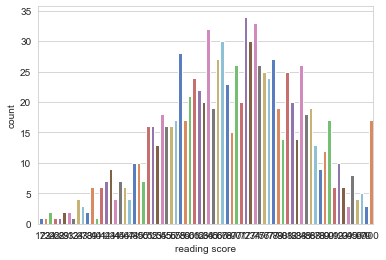

In [15]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

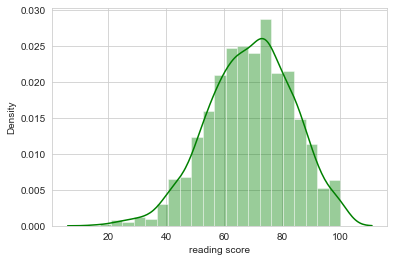

In [16]:
sns.distplot(df['reading score'],color='Green')
plt.show()

#### How many studends passed in reading ?

In [17]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'Fail', 'Pass')
df.Reading_PassStatus.value_counts()

Pass    746
Fail    254
Name: Reading_PassStatus, dtype: int64

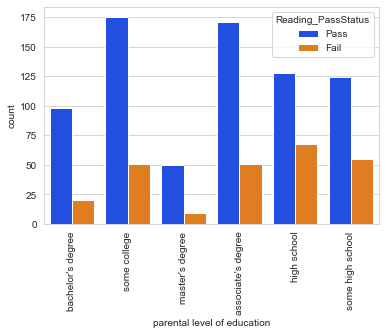

In [18]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore writing score

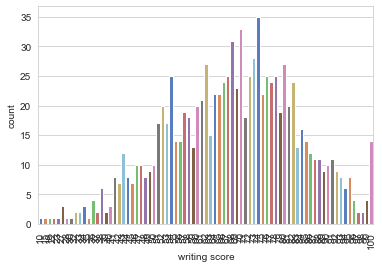

In [19]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

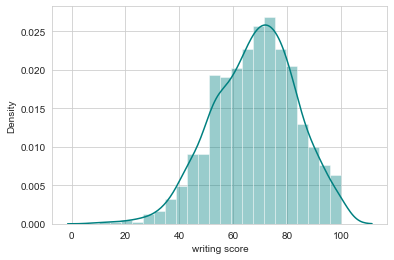

In [20]:
sns.distplot(df['writing score'],color='Teal')
plt.show()

#### How many students passed writing ?

In [21]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    719
F    281
Name: Writing_PassStatus, dtype: int64

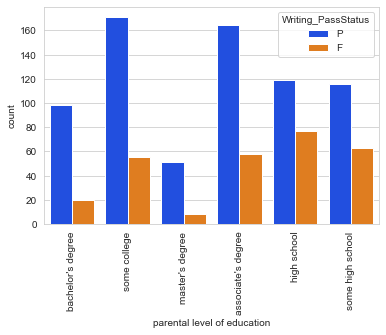

In [22]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Now Drawing a Figure Graph.

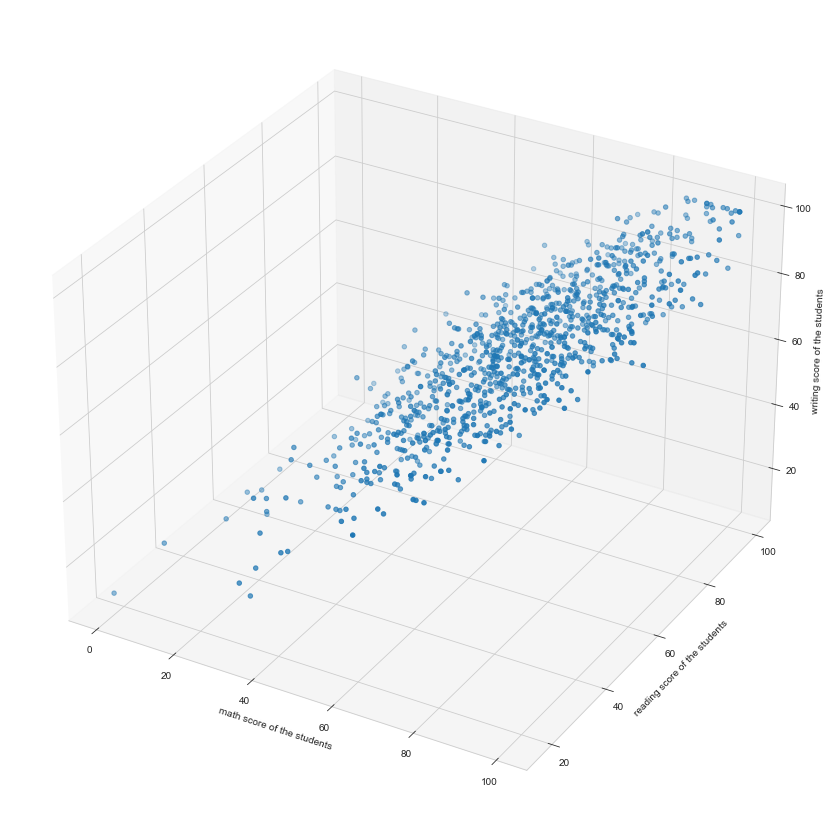

In [23]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

x = df['math score']
y = df['reading score']
z = df['writing score']

ax.set_xlabel("math score of the students")
ax.set_ylabel("reading score of the students")
ax.set_zlabel("writing score of the students")

ax.scatter(x, y, z)

plt.show()

#### Checking the Data Co-relation

In [24]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## Showing All Density Plots in Plot

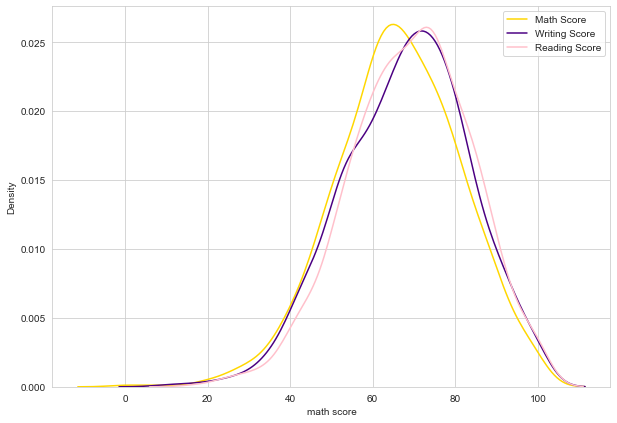

In [25]:
# show all density plots in plot
plt.figure(figsize=(10,7))

sns.kdeplot(df['math score'],shade=False,label='Maths',color='gold')
sns.kdeplot(df['writing score'],shade=False,label='Reading',color='indigo')
sns.kdeplot(df['reading score'],shade=False,label='Writing',color='pink')

plt.legend(['Math Score','Writing Score','Reading Score'])
plt.show()

#### Iet us check "How many students passed in all the subjects ?"

In [26]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    719
F    281
Name: OverAll_PassStatus, dtype: int64

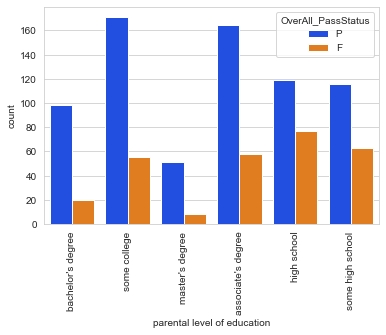

In [27]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Find the percentage of marks

In [28]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

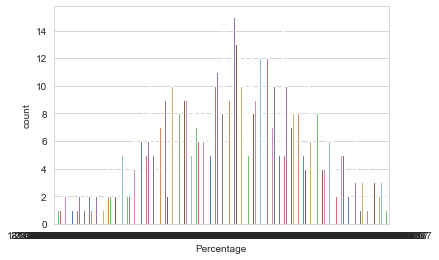

In [29]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

#### Let us assign the grades

### Grading 
####    above 80 = A Grade
####      70 to 80 = B Grade
####      60 to 70 = C Grade
####      50 to 60 = D Grade
####      40 to 50 = E Grade
####    below 40 = F Grade  ( means Fail )


In [30]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

F    281
B    261
C    228
A    198
D     32
Name: Grade, dtype: int64

#### we will plot the grades obtained in a order

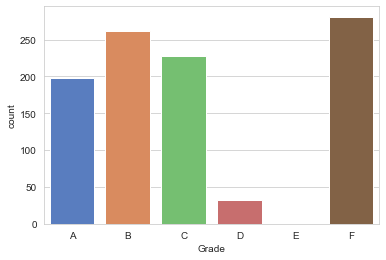

In [31]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

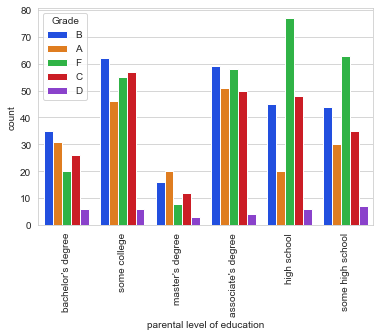

In [32]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

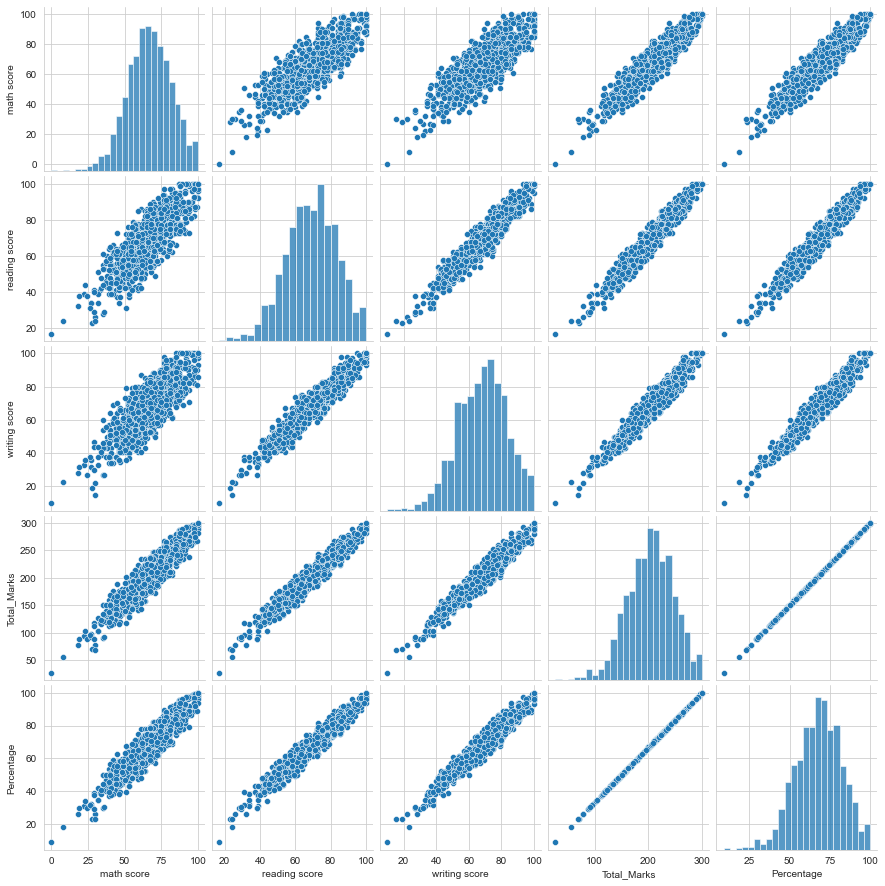

In [33]:
sns.pairplot(df)

####  Show paired plot of individual score of three subject by gender.

<Figure size 720x432 with 0 Axes>

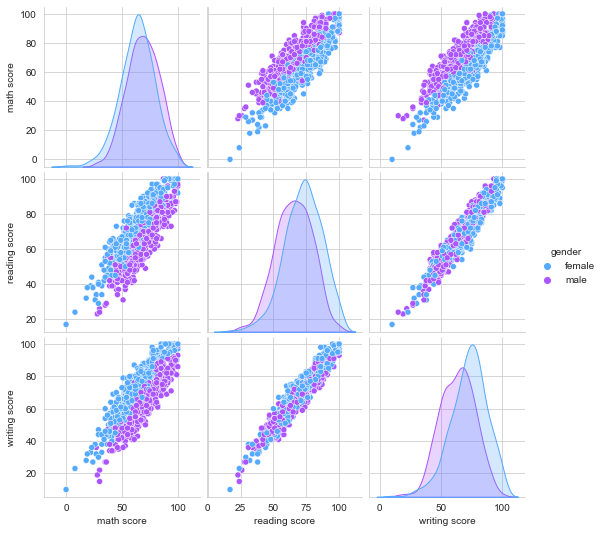

In [34]:
plt.figure(figsize=(10,6))

ind_score_df = df[['math score','reading score','writing score','gender']]
sns.pairplot(ind_score_df,hue='gender',palette='cool')

plt.show()